# # Graph for overleaf

# Imports

In [7]:
import os
from datetime import datetime
from time import time

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import aerosandbox.tools.pretty_plots as p

import casadi as ca
import aerosandbox as asb
import aerosandbox.numpy as np
from aerosandbox.tools.pretty_plots import plt, show_plot, set_ticks  # sets some nice defaults

# Data

In [8]:
# %% Fluent
VMG = {
    "35knots":{
        "alpha":[0,2,4,6,8,10,12,14],
        "X":np.array([0.01238, 0.01282,0.01374,0.0152,0.0174,0.0205,0.0253,0.037190885]),
        "Y":np.array([0.0680,0.2858,0.5012,0.7139,0.9202,1.1154,1.2885,1.3783982]),
        "finesse":np.divide(np.array([0.0680,0.2858,0.5012,0.7139,0.9202,1.1154,1.2885,1.3783982]), np.array([0.01238, 0.01282,0.01374,0.0152,0.0174,0.0205,0.0253,0.037190885])),
        "name":"VMG"
    },
    "15knots":{
        "alpha":[0,2,4,6,8,10,12],
        "X":np.array([0.014146559,0.014623615,0.01567578,0.017369679,0.019871987,0.023590835,0.03005214]),
        "Y":np.array([0.068806627,0.28206907,0.49373473,0.70139856,0.901616,1.0867955,1.2407821]),
        "finesse":np.divide(np.array([0.068806627,0.28206907,0.49373473,0.70139856,0.901616,1.0867955,1.2407821]), np.array([0.014146559,0.014623615,0.01567578,0.017369679,0.019871987,0.023590835,0.03005214])),
        "name":"VMG"
    },
}

Satori3 = {
    "35knots":{
        "alpha":[0,2,4,6,8,10,12,14],
        "X":np.array([0.0122,0.0127,0.0137,0.0153,0.0175,0.0207]),
        "Y":np.array([0.1274,0.3427,0.5568,0.7674,0.9715,1.1645]),
        "finesse":np.divide(np.array([0.1274,0.3427,0.5568,0.7674,0.9715,1.1645,1.3366162,1.4263998]), np.array([0.0122,0.0127,0.0137,0.0153,0.0175,0.0207,0.025579782,0.03805596])),
        "name":"R1 V5 Satori 3"
    },
    "15knots":{
        "alpha":[0,2,4,6,8,10,12],
        "X":np.array([0.014374627,0.014987094,0.016182839,0.018046263,0.020782054,0.024955442,0.033226079]),
        "Y":np.array([0.13389699,0.3433068,0.55149655,0.75566869,0.95144056,1.1305727,1.2652254]),
        "finesse":np.divide(np.array([0.13389699,0.3433068,0.55149655,0.75566869,0.95144056,1.1305727,1.2652254]), np.array([0.014374627,0.014987094,0.016182839,0.018046263,0.020782054,0.024955442,0.033226079])),
        "name":"R1 V5 Satori 3"
    },
}

R1V5 = {
    "35knots":{
        "alpha":[0,2,4,6,8,10,12,14],
        "X":np.array([0.012333208,0.012732367,0.01358394,0.014926362,0.016862645,0.019623612,0.023761473,0.031254137]),
        "Y":np.array([0.077093695,0.27604306,0.47592647,0.67284116,0.86375022,1.0457925,1.2116911,1.3411315]),
        "finesse":np.divide(np.array([0.077093695,0.27604306,0.47592647,0.67284116,0.86375022,1.0457925,1.2116911,1.3411315]),np.array([0.012333208,0.012732367,0.01358394,0.014926362,0.016862645,0.019623612,0.023761473,0.031254137]) ),
        "name":"R1V5"
    },
    "15knots":{
        "alpha":[0,2,4,6,8,10,12],
        "X":np.array([0.014096831,0.014541182,0.015494731,0.017010602,0.019239077,0.02250447,0.027721894]),
        "Y":np.array([0.07787562,0.27463688,0.47082865,0.66265134,0.84817565,1.021493,1.1735057]),
        "finesse":np.divide(np.array([0.07787562,0.27463688,0.47082865,0.66265134,0.84817565,1.021493,1.1735057]), np.array([0.014096831,0.014541182,0.015494731,0.017010602,0.019239077,0.02250447,0.027721894])),
        "name":"R1V5"
    },
}

# %% XFLR5
VMG_XFLR5 = {
    "35knots":{
        "alpha":[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14],
        "X":np.array([0.01238, 0.01282,0.01374,0.0152,0.0174,0.0205,0.0253,0.037190885]),
        "Y":np.array([0.0680,0.2858,0.5012,0.7139,0.9202,1.1154,1.2885,1.3783982]),
        "finesse":[8.432731,14.47487,20.51069,26.24445,32.02291,37.77729,43.10939,48.20618,54.28675,61.23296,67.39764,71.93828,75.45064,80.00893,83.88805,87.15075,90.12252,92.42872,92.42178,96.02426,99.02142,100.532,100.806,100.2714,97.98242,97.10268,97.1883,96.39871,95.10174],
        "name":"VMG"
    },
    "15knots":{
        "alpha":[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12],
        "X":np.array([0.014146559,0.014623615,0.01567578,0.017369679,0.019871987,0.023590835,0.03005214]),
        "Y":np.array([0.068806627,0.28206907,0.49373473,0.70139856,0.901616,1.0867955,1.2407821]),
        "finesse":[7.160582,12.09385,17.23687,22.07064,26.72992,31.63317,36.41449,40.9635,46.545,51.04033,54.94769,57.97559,59.67828,62.98529,65.95141,68.7967,71.46129,72.56411,74.15885,74.60605,74.65474,74.55634,74.64511,74.15793,71.5391],
        "name":"VMG"
    },
}

Satori3_XFLR5 = {
    "35knots":{
        "alpha":[0,1,1.5,2,2.5,3,3.5,4,4.5,5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14],
        "X":np.array([0.0122,0.0127,0.0137,0.0153,0.0175,0.0207]),
        "Y":np.array([0.1274,0.3427,0.5568,0.7674,0.9715,1.1645]),
        "finesse":[14.40547,26.66052,32.79414,38.91854,45.03578,51.29532,57.70022,64.06674,70.33497,74.89,84.37023,87.69996,91.74833,93.8144,97.61423,100.4121,101.4286,101.5496,101.5697,100.9296,99.27864,96.27078,95.05192,93.26027,90.70985,86.95823,81.50465],
        "name":"R1 V5 Satori 3"
    },
    "15knots":{
        "alpha":[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12],
        "X":np.array([0.014374627,0.014987094,0.016182839,0.018046263,0.020782054,0.024955442,0.033226079]),
        "Y":np.array([0.13389699,0.3433068,0.55149655,0.75566869,0.95144056,1.1305727,1.2652254]),
        "finesse":[12.18238,17.35105,22.63322,27.73799,33.05843,38.37374,43.71446,48.80404,53.55635,58.13058,63.12149,65.68551,70.14483,72.97141,76.72135,79.21655,79.2488,79.66535,79.37734,77.72621,76.63197,75.81471,74.2467,72.20369,68.4111],
        "name":"R1 V5 Satori 3"
    },
}

R1V5_XFLR5 = {
    "35knots":{
        "alpha":[0,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14],
        "X":np.array([0.012333208,0.012732367,0.01358394,0.014926362,0.016862645,0.019623612,0.023761473,0.031254137]),
        "Y":np.array([0.077093695,0.27604306,0.47592647,0.67284116,0.86375022,1.0457925,1.2116911,1.3411315]),
        "finesse":[8.408175,21.44763,27.75873,33.68392,39.70921,45.2536,50.67413,55.61169,60.70109,64.62074,69.23828,73.2993,75.9856,79.32901,82.69437,85.89146,85.35842,88.30226,90.25726,91.39575,91.50737,90.01367,90.22828,88.41968,86.24629,83.6618,80.23691,75.45375],
        "name":"R1V5"
    },
    "15knots":{
        "alpha":[0,0.5,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12],
        "X":np.array([0.014096831,0.014541182,0.015494731,0.017010602,0.019239077,0.02250447,0.027721894]),
        "Y":np.array([0.07787562,0.27463688,0.47082865,0.66265134,0.84817565,1.021493,1.1735057]),
        "finesse":[6.527238,11.99644,22.59864,27.68489,32.38171,37.05303,41.36351,45.36264,49.18126,52.67931,55.24592,58.57839,61.334,64.33917,66.58899,67.7853,68.17132,70.42722,72.05873,72.89842,70.57267,67.00166,65.62317,63.92389],
        "name":"R1V5"
    },
}

# %% turbulence model
Satori3_kwSST = {
    "35knots":{
        "X":np.array([0.012350124,0.012920228,0.014058678,0.015819647,0.018382201,0.022152613,0.028555935]),
        "Y":np.array([0.12492689,0.33164831,0.54183034,0.74772248,0.94507299,1.1260453,1.2710761]),
        "finesse":np.divide(np.array([0.12492689,0.33164831,0.54183034,0.74772248,0.94507299,1.1260453,1.2710761]),np.array([0.012350124,0.012920228,0.014058678,0.015819647,0.018382201,0.022152613,0.028555935])),
        "name":"k-ω SST"
    }
}
# Error = {
#     "35knots":{
#         "X":[0,2,4,6,8,10,12],
#         "Y":np.divide(np.abs(Satori3["35knots"]["finesse"] - Satori3_kwSST["35knots"]["finesse"]),Satori3["35knots"]["finesse"]),
#         "name":"Error"
#     }
# }

# %% 2D optimization
Satori3_30knots = {
    "Y":np.array([10.57527914,25.97569185,38.58300078,47.39532769,52.00307382,52.19174439,46.81418634]),
    "X":np.array([0,2,4,6,8,10,12]),
    "name":"R1 V5 Satori3 - 30knots"
}
Satori3_15knots = {
    "Y":np.array([9.314814917,22.90682904,34.07909762,41.8739708,45.78183465,45.30365361,38.07928706]),
    "X":np.array([0,2,4,6,8,10,12]),
    "name":"R1 V5 Satori3 - 15knots"
}
Optimized_30knots = {
    "Y":np.array([11.63161799,27.42010386,40.25849021,49.21457476,53.95157691,54.42808394,50.16483726]),
    "X":np.array([0,2,4,6,8,10,12]),
    "name":"Optimized - 30knots"
}
Optimized_15knots = {
    "Y":np.array([10.13533312,24.11373845,35.52176259,43.49939001,47.57357567,47.5094197,42.13031109]),
    "X":np.array([0,2,4,6,8,10,12]),
    "name":"Optimized - 15knots"
}

alpha = [0,2,4,6,8,10,12]

# Plots

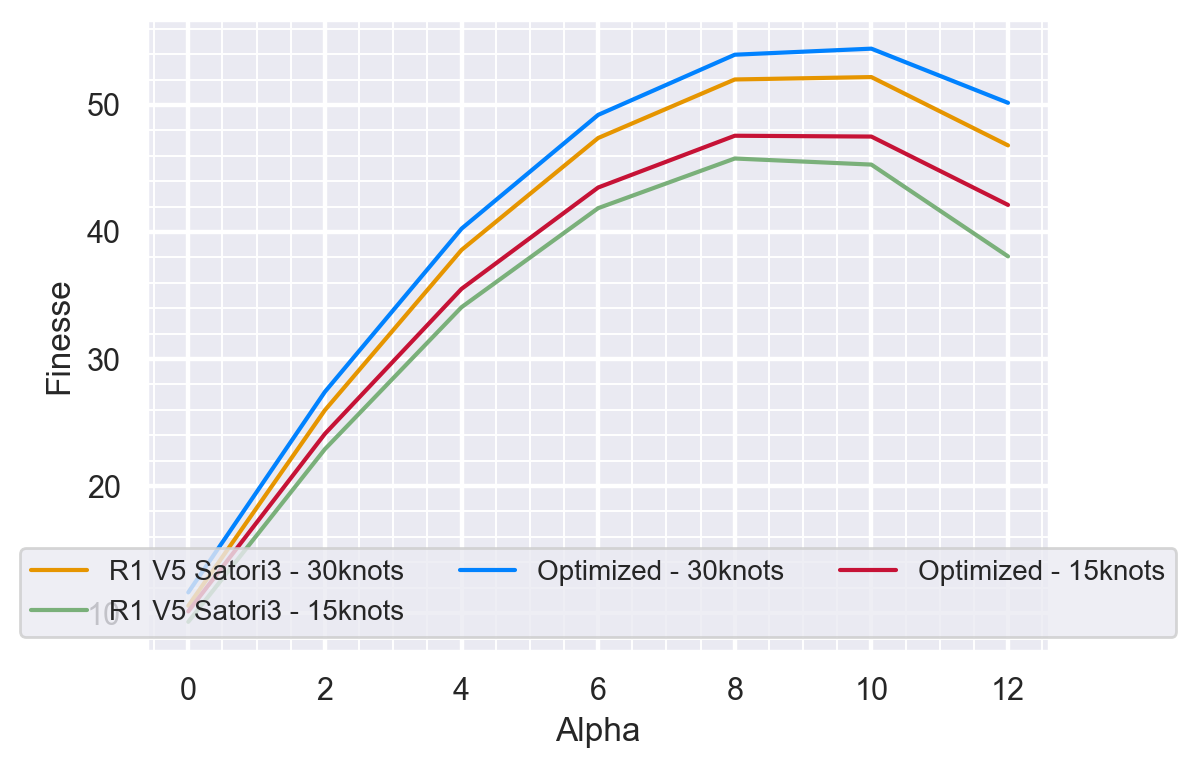

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

for i, af in enumerate([
    Satori3_30knots, 
    Satori3_15knots,
    Optimized_30knots,
    Optimized_15knots
]):
    color = p.adjust_lightness(["orange", "darkseagreen", "dodgerblue", "crimson", "palevioletred", "gray"][i], 0.9)
    ax.plot(
        af["X"],af["Y"],
        color=color,
        label=af["name"]
    )
    # ax[1].plot(
    #     af["15knots"]["X"], af["15knots"]["Y"],
    #     color=color,
    #     label=af["15knots"]["name"]
    # )


ax.legend(fontsize=10, loc="lower center", ncol=3)
# ax[0].set_title("Aerodynamic Polars - 35 knots")
ax.set_xlabel("Alpha")
ax.set_ylabel("Finesse")

# ax[0].axis('equal')

# ax[1].legend(fontsize=10, loc="lower center", ncol=3)
# # ax[1].set_title("Aerodynamic Polars - 15 knots")
# ax[1].set_xlabel("Drag Coefficient $C_D$")
# ax[1].set_ylabel("Lift Coefficient $C_L$")

p.show_plot("", legend=False)